In [ ]:
# Environment Requirements
# This notebook requires Python 3.10
# Check your Python version
import sys
print(f"Python version: {sys.version}")

# Check syndirella version (must be >=4.0.0)
!pip show syndirella

import os
import glob2

import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw

# install syndirella if not already installed
#! pip install --upgrade syndirella

## Setup AiZynthFinder (will take ~5 min)

⚠️ WARNING: This step downloads large model files (~750MB total) if run the first time. These are required to run AiZynthFinder. 

Files will be downloaded to: [syndirella_package_path]/aizynth/

In [ ]:
!syndirella setup-aizynth

## Input

In [2]:
df = pd.read_csv('syndirella_input_example_manual.csv')
df

,smiles,reaction_name_step1,reactant_step1,reactant2_step1,product_step1,reaction_name_step2,reactant_step2,product_step2,reaction_name_step3,reactant_step3,hit1,hit2,hit3,template,compound_set
0,CCOC(=O)c1cc(NC(=O)CC#N)n(C)n1,Amide Schotten-Baumann with amine,N#CCC(=O)Cl,CCOC(=O)c1cc(N)n(C)n1,NaN,NaN,NaN,NaN,NaN,NaN,Ax0556a,Ax0310a,NaN,Ax0310a,syndirella_manual
1,CC(=O)N(C)c1ccc(NCc2cccc(C(C)C)c2)cn1,Amide Schotten-Baumann with amine,CNc1ccc(I)cn1,CC(=O)Cl,CC(=O)N(C)c1ccc(I)cn1,N-nucleophilic aromatic substitution,CC(C)c1cccc(CN)c1,NaN,NaN,NaN,Ax0310a,Ax0365a,NaN,Ax0310a,syndirella_manual
2,CC(=O)Nc1c(CC(=O)NC(CNC(=O)CCl)c2ccc3ccccc3c2)...,Amidation,O=C(O)CB(O)O,NCC(N)c1ccc2ccccc2c1,NCC(NC(=O)CB(O)O)c1ccc2ccccc2c1,Amidation,O=C(O)CCl,O=C(CCl)NCC(NC(=O)CB(O)O)c1ccc2ccccc2c1,Suzuki coupling,CC(=O)Nc1c(Br)c(C)nn1C,x1346,NaN,NaN,x1346,syndirella_manual


Here the exact retrosynthesis routes are shown. It is mostly self-explanatory, but an important note is that for all reactions after step 1, there is only 1 reactant listed. The product of the previous step is the other reactant (if a bimolecular reaction). 

### Routes

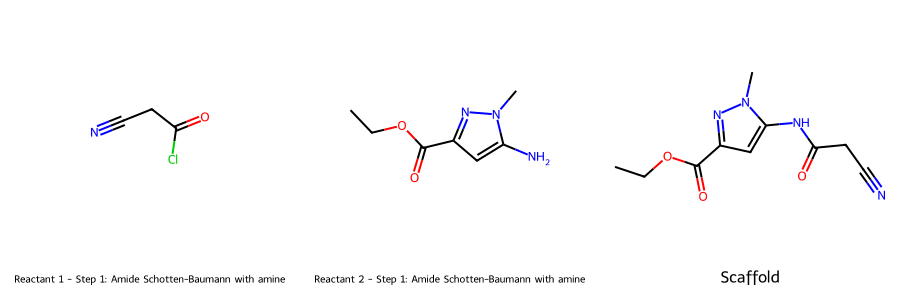

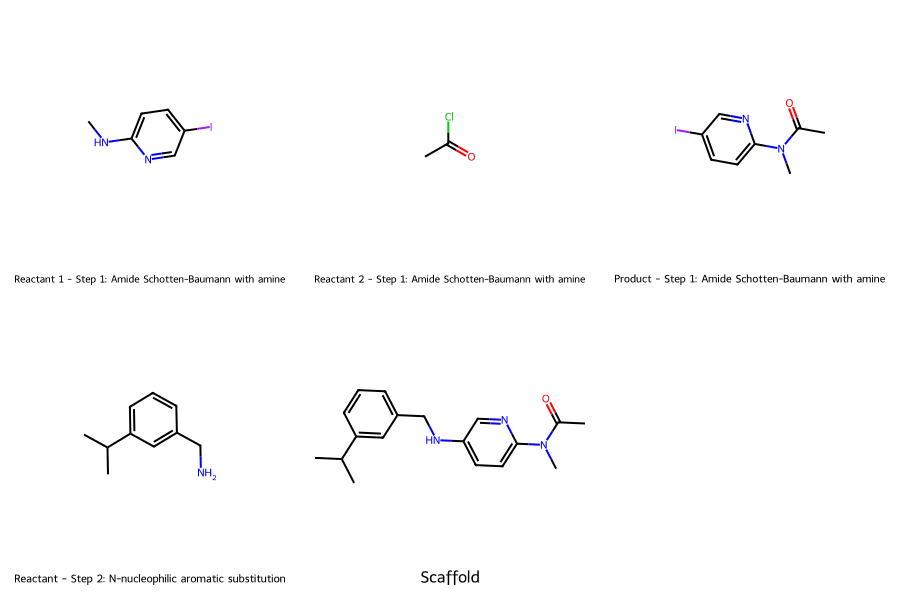

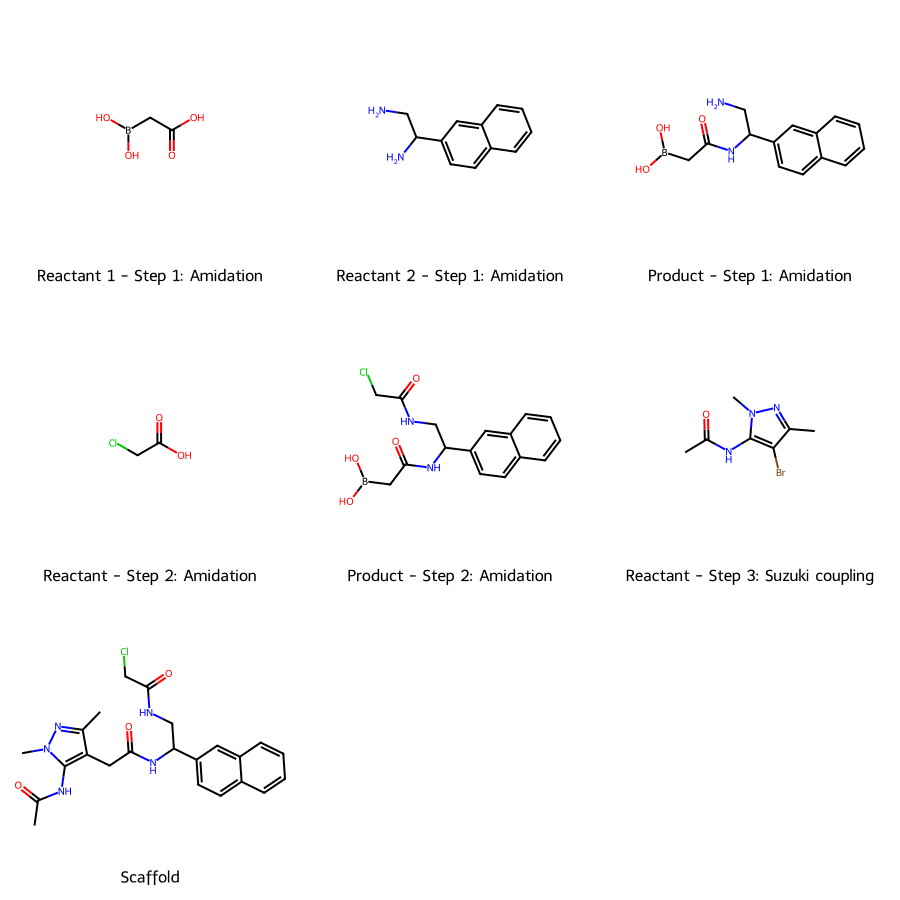

In [3]:
# Function to create RDKit molecules and grid image
def display_reactions_from_df(df, num_steps):
    df = df.fillna(value='None')

    mols = []
    legends = []

    for index, row in df.iterrows():
        # Step 1 Reactants and Product
        if row['reactant_step1'] != 'None':
            mols.append(Chem.MolFromSmiles(row['reactant_step1']))
            legends.append(f"Reactant 1 - Step 1: {row['reaction_name_step1']}")
        if row['reactant2_step1'] != 'None':
            mols.append(Chem.MolFromSmiles(row['reactant2_step1']))
            legends.append(f"Reactant 2 - Step 1: {row['reaction_name_step1']}")
        if row['product_step1'] != 'None':
            mols.append(Chem.MolFromSmiles(row['product_step1']))
            legends.append(f"Product - Step 1: {row['reaction_name_step1']}")

        # Step 2 Reactants and Product (if present)
        if row['reactant_step2'] != 'None':
            mols.append(Chem.MolFromSmiles(row['reactant_step2']))
            legends.append(f"Reactant - Step 2: {row['reaction_name_step2']}")
        if row['product_step2'] != 'None':
            mols.append(Chem.MolFromSmiles(row['product_step2']))
            legends.append(f"Product - Step 2: {row['reaction_name_step2']}")

        # Step 3 Reactants and Product (if present)
        if row['reactant_step3'] != 'None':
            mols.append(Chem.MolFromSmiles(row['reactant_step3']))
            legends.append(f"Reactant - Step 3: {row['reaction_name_step3']}")

        # Final product
        mols.append(Chem.MolFromSmiles(row['smiles']))
        legends.append("Scaffold")

    # Draw the molecules with legends underneath
    img = Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(300, 300), legends=legends, useSVG=True)
    return img

# First route
display(display_reactions_from_df(df[:1], num_steps=1))

# Second route
display(display_reactions_from_df(df[1:2], num_steps=1))

# Third route
display_reactions_from_df(df[2:3], num_steps=1)

## Run

In [ ]:
# Run the pipeline with absolute paths, can take anywhere from 1–2 hours (specifying a reduced batch_num and atom_diff_max for example purposes)
!syndirella run -i $(pwd)/syndirella_input_example_manual.csv -o $(pwd)/output -t $(pwd)/fragments/templates/ --hits_path $(pwd)/fragments/A71EV2A_combined.sdf --metadata $(pwd)/fragments/metadata.csv --batch_num 5 --atom_diff_max 5 --manual

/Users/kate_fieseler/miniconda3/envs/syndirella_env/lib/python3.10/site-packages/fragmenstein/igor/pyrosetta_import.py:38: RuntimeWarning: PyRosetta is not installed. A mock object is loaded. Any Igor calls will fail.
  warnings.warn('PyRosetta is not installed. A mock object is loaded. Any Igor calls will fail.',
/Users/kate_fieseler/miniconda3/envs/syndirella_env/lib/python3.10/site-packages/fragmenstein/branding.py:36: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
2025-08-11 17:07:25,555 - root - WARNING - ARTHOR_API_URL environment variable not set. Using default: https://arthor.docking.org
2025-08-11 17:07:36,785 - root - INFO - Running the pipeline...
2025-08-11 17:07:36,785 - syndirella.pipeline - INFO - Running the pipeline with manual routes.
2025-08-11 17:07:36

## Output

The first thing you should look at after running is the output csv which contains the stats for each of the scaffold elaborations.

In [12]:
output_csv_path = glob2.glob('output/syndirella_input_example_manual_output*')[0]
df = pd.read_csv(output_csv_path)
df

,smiles,inchi_key,error_type,error_message,retro_tool,db_search_tool,1_r1_smiles,1_r2_smiles,1_reaction,2_r1_smiles,...,elab_single_reactant,hit1,hit2,num_placed,num_successful,route_uuid,template,to_hippo,total_num_products_enumstereo,total_num_unique_products
0,CCOC(=O)c1cc(NC(=O)CC#N)n(C)n1,AJVIKZPIPBHAKY-UHFFFAOYSA-N,NaN,NaN,aizynthfinder,arthor,N#CCC(=O)Cl,CCOC(=O)c1cc(N)n(C)n1,Amide_Schotten-Baumann_with_amine,NaN,...,0.0,A71EV2A-x0556_A_147_1_A71EV2A-x0526+A+147+1,A71EV2A-x0310_A_147_1_A71EV2A-x0526+A+147+1,5,2,Dvo36q,fragments/templates/Ax0310a_apo-desolv.pdb,output/AJVIKZPIPBHAKY-UHFFFAOYSA-N/AJVIKZPIPBH...,1478.0,986.0
1,CC(=O)N(C)c1ccc(NCc2cccc(C(C)C)c2)cn1,WYGQDRQQQRDYQK-UHFFFAOYSA-N,NaN,NaN,aizynthfinder,arthor,CNc1ccc(I)cn1,CC(=O)Cl,Amide_Schotten-Baumann_with_amine,CC(=O)N(C)c1ccc(I)cn1,...,0.0,A71EV2A-x0310_A_147_1_A71EV2A-x0526+A+147+1,A71EV2A-x0365_A_201_1_A71EV2A-x0526+A+147+1,5,1,beypMf,fragments/templates/Ax0310a_apo-desolv.pdb,output/WYGQDRQQQRDYQK-UHFFFAOYSA-N/WYGQDRQQQRD...,14523.0,10100.0
2,CC(=O)Nc1c(CC(=O)NC(CNC(=O)CCl)c2ccc3ccccc3c2)...,SXYLVBRZJXQQRT-UHFFFAOYSA-N,NaN,NaN,aizynthfinder,arthor,O=C(O)CB(O)O,NCC(N)c1ccc2ccccc2c1,Amidation,NCC(NC(=O)CB(O)O)c1ccc2ccccc2c1,...,0.0,A71EV2A-x1346_A_250_1_A71EV2A-x0526+A+147+1,NaN,5,2,B6kjYj,fragments/templates/Ax1346a_apo-desolv.pdb,output/SXYLVBRZJXQQRT-UHFFFAOYSA-N/SXYLVBRZJXQ...,24384.0,6944.0


In [13]:
df.iloc[0]

smiles                                              CCOC(=O)c1cc(NC(=O)CC#N)n(C)n1
inchi_key                                              AJVIKZPIPBHAKY-UHFFFAOYSA-N
error_type                                                                     NaN
error_message                                                                  NaN
retro_tool                                                           aizynthfinder
db_search_tool                                                              arthor
1_r1_smiles                                                            N#CCC(=O)Cl
1_r2_smiles                                                  CCOC(=O)c1cc(N)n(C)n1
1_reaction                                       Amide_Schotten-Baumann_with_amine
2_r1_smiles                                                                    NaN
2_r2_smiles                                                                    NaN
2_reaction                                                                     NaN
3_r1

From the three scaffolds elaborated, all resulted in elaborations and successfully placed products. 

The final output is the `to_hippo.pkl.gz` which contains all the information to produce the elaborations. This includes, the synthesis route, placement, and other metadata. Let's look at the first one below. 

In [15]:
# the to_hippo.pkl.gz is contained within each scaffold directory. 
df = pd.read_pickle('output/AJVIKZPIPBHAKY-UHFFFAOYSA-N/AJVIKZPIPBHAKY-UHFFFAOYSA-N_Dvo36q_to_hippo.pkl.gz')
df

,scaffold_smiles,1_reaction,1_r1_smiles,1_r2_smiles,1_r_previous_product,1_product_smiles,1_product_name,1_flag,1_single_reactant_elab,1_num_atom_diff,1_stereoisomer,error,∆∆G,∆G_bound,∆G_unbound,comRMSD,regarded,path_to_mol,template,intra_geometry_pass
0,CCOC(=O)c1cc(NC(=O)CC#N)n(C)n1,Amide_Schotten-Baumann_with_amine,N#CCC(=O)Cl,CCOC(=O)c1cc(N)n(C)n1,None,CCOC(=O)c1cc(NC(=O)CC#N)n(C)n1,AJVIKZPIPBHAKY-UHFFFAOYSA-N-Dvo36q-scaffold-A,None,False,0,A,None,1.336279,423.462957,422.126678,1.848140,"[A71EV2A-x0556_A_147_1_A71EV2A-x0526+A+147+1, ...",/Users/kate_fieseler/CursorProjects/syndirella...,/Users/kate_fieseler/CursorProjects/syndirella...,True
1,CCOC(=O)c1cc(NC(=O)CC#N)n(C)n1,Amide_Schotten-Baumann_with_amine,N#CCC(=O)Cl,CCOC(=O)c1cc(N)n(C)n1.Cl,None,CCOC(=O)c1cc(NC(=O)CC#N)n(C)n1,AJVIKZPIPBHAKY-UHFFFAOYSA-N-Dvo36q-scaffold-A,None,False,0,A,None,1.336279,423.462957,422.126678,1.848140,"[A71EV2A-x0556_A_147_1_A71EV2A-x0526+A+147+1, ...",/Users/kate_fieseler/CursorProjects/syndirella...,/Users/kate_fieseler/CursorProjects/syndirella...,True
2,CCOC(=O)c1cc(NC(=O)CC#N)n(C)n1,Amide_Schotten-Baumann_with_amine,N#CCC(=O)Cl,CCOC(=O)c1cc2n(n1)CCN2.Cl,None,CCOC(=O)c1cc2n(n1)CCN2C(=O)CC#N,AJVIKZPIPBHAKY-UHFFFAOYSA-N-Dvo36q-1-A,None,False,1,A,,654.703993,1001.392450,346.688457,3.487122,"[A71EV2A-x0556_A_147_1_A71EV2A-x0526+A+147+1, ...",/Users/kate_fieseler/CursorProjects/syndirella...,/Users/kate_fieseler/CursorProjects/syndirella...,False
3,CCOC(=O)c1cc(NC(=O)CC#N)n(C)n1,Amide_Schotten-Baumann_with_amine,N#CCC(=O)Cl,CCOC(=O)c1cc(N)n(CC)n1,None,CCOC(=O)c1cc(NC(=O)CC#N)n(CC)n1,AJVIKZPIPBHAKY-UHFFFAOYSA-N-Dvo36q-17-A,None,False,1,A,,-11.781184,524.172957,535.954140,1.334258,"[A71EV2A-x0556_A_147_1_A71EV2A-x0526+A+147+1, ...",/Users/kate_fieseler/CursorProjects/syndirella...,/Users/kate_fieseler/CursorProjects/syndirella...,True
4,CCOC(=O)c1cc(NC(=O)CC#N)n(C)n1,Amide_Schotten-Baumann_with_amine,N#CCC(=O)Cl,CCOC(=O)c1cc(NC)n(C)n1,None,CCOC(=O)c1cc(N(C)C(=O)CC#N)n(C)n1,AJVIKZPIPBHAKY-UHFFFAOYSA-N-Dvo36q-18-A,None,False,1,A,,3.102041,586.704850,583.602809,2.396101,"[A71EV2A-x0556_A_147_1_A71EV2A-x0526+A+147+1, ...",/Users/kate_fieseler/CursorProjects/syndirella...,/Users/kate_fieseler/CursorProjects/syndirella...,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,CCOC(=O)c1cc(NC(=O)CC#N)n(C)n1,Amide_Schotten-Baumann_with_amine,CC(C)(C#N)C(=O)Cl,CC(OC(=O)c1cc(N)n(C)n1)C1CC1,None,C[C@H](OC(=O)c1cc(NC(=O)C(C)(C)C#N)n(C)n1)C1CC1,AJVIKZPIPBHAKY-UHFFFAOYSA-N-Dvo36q-983-A,None,False,5,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/Users/kate_fieseler/CursorProjects/syndirella...,NaN
1497,CCOC(=O)c1cc(NC(=O)CC#N)n(C)n1,Amide_Schotten-Baumann_with_amine,CC(C)(C#N)C(=O)Cl,CC(OC(=O)c1cc(N)n(C)n1)C1CC1,None,C[C@@H](OC(=O)c1cc(NC(=O)C(C)(C)C#N)n(C)n1)C1CC1,AJVIKZPIPBHAKY-UHFFFAOYSA-N-Dvo36q-983-B,None,False,5,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/Users/kate_fieseler/CursorProjects/syndirella...,NaN
1498,CCOC(=O)c1cc(NC(=O)CC#N)n(C)n1,Amide_Schotten-Baumann_with_amine,CC(C)(C#N)C(=O)Cl,Cn1nc(C(=O)OC2CC=CC2)cc1N,None,Cn1nc(C(=O)OC2CC=CC2)cc1NC(=O)C(C)(C)C#N,AJVIKZPIPBHAKY-UHFFFAOYSA-N-Dvo36q-984-A,None,False,5,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/Users/kate_fieseler/CursorProjects/syndirella...,NaN
1499,CCOC(=O)c1cc(NC(=O)CC#N)n(C)n1,Amide_Schotten-Baumann_with_amine,CC(C)(C#N)C(=O)Cl,CCOC(=O)c1cc(N)n(C2COC2)n1,None,CCOC(=O)c1cc(NC(=O)C(C)(C)C#N)n(C2COC2)n1,AJVIKZPIPBHAKY-UHFFFAOYSA-N-Dvo36q-985-A,None,False,5,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/Users/kate_fieseler/CursorProjects/syndirella...,NaN


In [19]:
# Looking at the results
placed = df[df['∆∆G'].notna()]
placed['acceptable'] = (placed['∆∆G'] < 0) & (placed['comRMSD'] < 2.0) & (placed['intra_geometry_pass'])
placed['acceptable'].value_counts()

acceptable
False    5
True     2
Name: count, dtype: int64

Out of the 7 elaborated designs energy minimized, 2 (28.6%) passed the usual filters of `∆∆G < 0 & comRMSD < 2.0 & passed intramolecular geometry checks`.

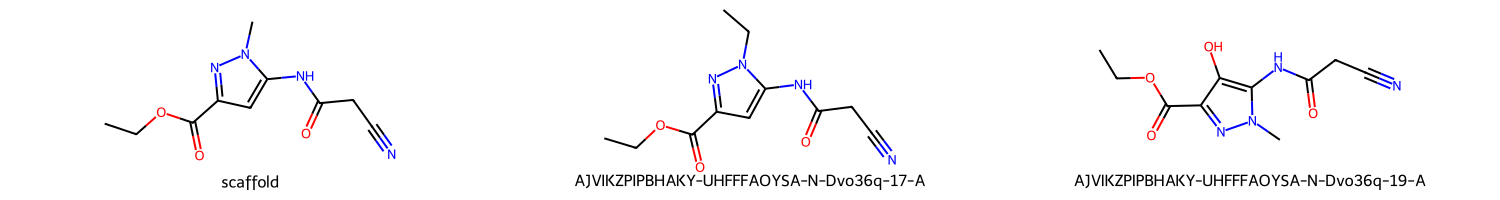

In [21]:
accept_df = placed[placed['acceptable']]
scaffold = Chem.MolFromSmiles(accept_df['scaffold_smiles'].iloc[0])
passing_mols = [scaffold] + [Chem.MolFromSmiles(smiles) for smiles in accept_df['1_product_smiles']]
legends = ['scaffold'] + accept_df['1_product_name'].tolist()
Draw.MolsToGridImage(passing_mols, legends=legends, molsPerRow=3, subImgSize=(500, 200))